# **Logistic Regression Model**

_Start by importing the libraries and packages as usual_

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sympy.stats import Logistic

In [146]:
df = pd.read_csv('/mnt/1A44D5FD44D5DC17/Projects/Breast Cancer Detection/data.csv')

In [147]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


_Here, I thought about getting some statistical data about the dataset_

In [148]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


_**ID** and **Unnamed: 32** columns are looking really weird! Let's check for the data types and for any null values_

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [150]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

_Here, I decided to remove any feature that won't make a difference in the prediction: **ID, Unnamed: 32**._

In [151]:
df.drop(columns=['id','Unnamed: 32'],inplace=True,axis=1)

_Here, I used one hot encoding to change the categorical values to numerical (boolean) values. **Used 1 for Malignant and 0 for Benign.**_

In [152]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


_Let's get our features vector (x) and target vector (y) ready!_

In [153]:
X=df.drop(columns=['diagnosis'],axis=1)
y=df['diagnosis']

<Axes: >

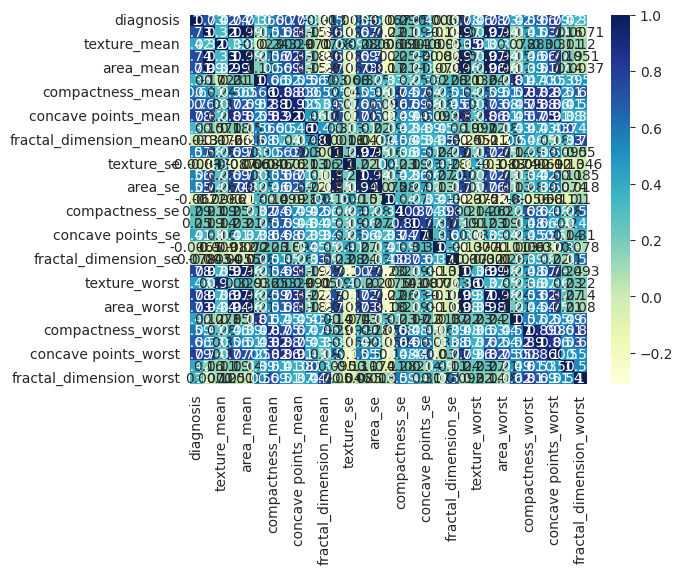

In [154]:
sns.heatmap(df.corr(), cmap='YlGnBu',annot=True)

__Found out that the notebook is hard to comprehend due to its large amount of features and my beginner level expertise. So, I decided to only check if there is any feature that is highly correlated to **diagnosis** feature._ Later on, I will try to get the correlation matrix between all the other features._

In [155]:
corr = df.corr()
top_corr = corr['diagnosis'].abs().sort_values(ascending=False)
top_corr.head()

diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
Name: diagnosis, dtype: float64

_Let's do our **train-test split** to train the model and test it._

In [156]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

_Here I thought that I might need to standardize the data because each feature in the dataset has a **different range**._

In [157]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

_Now, it's time to import the model itself and start making some predictions! we will use **Logistic Regression** model for this dataset as we want to make **binary** predictions._

## Training the Logistic Regression model

_First, let's import the time module to calculate the time needed to train each model_

In [158]:
import time

In [159]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# training the model
start = time.time()
lr.fit(X_train, y_train)
end = time.time()
logreg_time = end - start

y_pred = lr.predict(X_test)

_Now, we need to set the threshold and make some roundings in order to be able to classify **Malignant** and **Benign** tumors. We will also use **type casting** to convert this **from boolean to integer**._

In [160]:
threshold = 0.5
y_pred = (y_pred >= threshold).astype(int)

_The time for the **metrics** has come! Let's get the **accuracy, precision, recall, and F1-score** right!_

In [257]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9824561403508771
[[106   2]
 [  1  62]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



# **Time for XGBoost**

_We import the model and set the evaluation metric to be **BinaryCrossentropy** because are making a binary classification._

In [162]:
from xgboost import XGBClassifier
treeModel = XGBClassifier(eval_metric='logloss')

_**Fit** the data to the model._

In [163]:
start = time.time()
treeModel.fit(X_train, y_train)
end = time.time()
xg_time = end - start

_Now, we get the **predictions** and check the metrics for this model._

In [164]:
y_tree_pred = treeModel.predict(X_test)
print(accuracy_score(y_tree_pred,y_test))
print(confusion_matrix(y_test,y_tree_pred))
print(classification_report(y_test,y_tree_pred))

0.9649122807017544
[[104   4]
 [  2  61]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       108
           1       0.94      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



# ***SVM (Support Vector Machine)***

#### *thought about using the SVM since it can deal effectively with datasets with large number of features*

In [165]:
from sklearn.svm import SVC

_Now let's fit the SVM classifier to the data using the **RBF (Radial Basis Function)** kernel and get the predictions_

In [248]:
svm = SVC(kernel='rbf') # we will use the default values for 'C' and "gamma" hyperparameters

start = time.time()
svm.fit(X_train, y_train)
end = time.time()
svm_time = end - start

y_svm_pred = svm.predict(X_test)

_Now, we need to check the F1-score for the SVM_

In [249]:
print("Confusion Matrix")
print(confusion_matrix(y_test,y_svm_pred))
print("\n")

print("Classification Report:")
print(classification_report(y_test,y_svm_pred))

Confusion Matrix
[[105   3]
 [  2  61]]


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



Here we can see that our **SVM** model achieved a good recall (0.99) and only one example i the dataset was FN (as see in the top right of the _Confusion Matrix_), and we might need to focus more on the **recall** in this classification problem since **FNs (False Negatives)** are more costly in the breast cancer predictions, so we need our model to have the least FNs.

### Compare the **F1-scores** for the 3 different models

In [250]:
print("Logistic Regression F1-Score")
print(f1_score(y_test,y_pred))
print('\n')

print("XGBoost F1-Score")
print(f1_score(y_test,y_tree_pred))
print('\n')

print("SVM F1-Score")
print(f1_score(y_test,y_svm_pred))

Logistic Regression F1-Score
0.9763779527559056


XGBoost F1-Score
0.953125


SVM F1-Score
0.9606299212598425


### Compare the **ROC-AUC scores** for the 3 different models

In [258]:
print("Logistic Regression ROC-AUC score")
print(roc_auc_score(y_test,y_pred))
print('\n')

print("XGBoost ROC-AUC score")
print(roc_auc_score(y_test,y_tree_pred))
print('\n')

print("SVM ROC-AUC score")
print(roc_auc_score(y_test,y_svm_pred))

Logistic Regression ROC-AUC score
0.9828042328042329


XGBoost ROC-AUC score
0.9656084656084657


SVM ROC-AUC score
0.9702380952380952


 _This shows that **Logistic Regression** outperformed the other two models in F1 and ROC-AUC scores.<br>
  So, we will consider using the **Logistic Regression** model because it gives us much higher **f1-score** and a **recall** of **0.98** which is crucial for this classification problem._

### Now, we need to compare the computation time taken by each model

In [251]:
print("Logistic Regression training time:")
print(logreg_time)
print('\n')

print("XGBoost training time:")
print(xg_time)
print('\n')

print("SVM training time:")
print(svm_time)

Logistic Regression training time:
0.002969026565551758


XGBoost training time:
0.0379636287689209


SVM training time:
0.0026564598083496094


Now, we might do **cross validation** to our models and see how will they score

In [255]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

models = {"Logistic Regression":lr,
         "XGBoost": treeModel,
         "SVM":svm}

results={}

for name,model in models.items():
    f1_scores = cross_val_score(model, X_train, y_train, cv=cv,scoring='f1')
    roc_auc = cross_val_score(model, X_train, y_train, cv=cv,scoring='roc_auc')

    results[name] = {"f1_scores_mean":f1_scores.mean(),"roc_auc_mean":roc_auc.mean()}

import pandas as pd
pd.DataFrame(results).T

,f1_scores_mean,roc_auc_mean
Logistic Regression,0.968422,0.995124
XGBoost,0.950381,0.990514
SVM,0.955556,0.994321


## **Final Note:**
### **Why is Recall crucial for this classification problem?**
#### _this is because Recall = **TP / (TP + FN)**, and we need to achieve the highest recall we can possibly get since FN (False Negatives) are the most costly in breast cancer case._

## Thank you for following by till the end.

# **MUCH LOVE <3!**